In [4]:
from rock import *
import pandas as pd
import rock

In [5]:
print(dir(rock.corr))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'accumulate', 'chain', 'combinations', 'combinations_with_replacement', 'compress', 'count', 'cycle', 'dropwhile', 'filterfalse', 'groupby', 'islice', 'make_ANOVA_df', 'make_pvalue_df', 'make_ttest_df', 'pd', 'permutations', 'product', 'repeat', 'spst', 'starmap', 'takewhile', 'tee', 'warnings', 'zip_longest']


In [13]:
data = pd.read_csv('train.csv')
display(data.head(), data.shape)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


(8693, 14)

In [17]:
display(useful.checkNAN(data))
check_features(data)

,index_in_train,column_name,NAN_number
0,1,HomePlanet,201
1,2,CryoSleep,217
2,3,Cabin,199
3,4,Destination,182
4,5,Age,179
5,6,VIP,203
6,7,RoomService,181
7,8,FoodCourt,183
8,9,ShoppingMall,208
9,10,Spa,183


categorical_features: ['Destination', 'CryoSleep', 'VIP', 'PassengerId', 'Cabin', 'Transported', 'Name', 'HomePlanet']
numerical_features: ['RoomService', 'Age', 'Spa', 'ShoppingMall', 'FoodCourt', 'VRDeck']


(['Destination',
  'CryoSleep',
  'VIP',
  'PassengerId',
  'Cabin',
  'Transported',
  'Name',
  'HomePlanet'],
 ['RoomService', 'Age', 'Spa', 'ShoppingMall', 'FoodCourt', 'VRDeck'])

In [21]:
df = data.loc[:, ['RoomService', 'Age', 'Spa', 'ShoppingMall', 'FoodCourt', 'VRDeck']]
# list = [['for_fill_na'], ['for_fill_value1', 'for_fill_value2'], ['for_back_fill'], ['for_front_fill'], ['for_linear'], ['for_KNN_imputer1', 'for_KNN_imputer2']]
# fill_na = [ 0, Value_to_fill ] # <-- (The number that goes into the first digit is the order of processing.)
# fill_value = [ 1, [ Value_to_fill1, Value_to_fill2 ]]
fill_na = [-1, 12]
fill_value = [-1, [1]]
back_fill = -1
front_fill = -1
linear = -1
KNN = [ 0, 7 ]

handle_NAN(df, list, fill_na, fill_value, back_fill, front_fill, linear, KNN)
data.loc[:, ['RoomService', 'Age', 'Spa', 'ShoppingMall', 'FoodCourt', 'VRDeck']] = df
checkNAN(data)
# data1 = data.dropna(axis = 0)

,index_in_train,column_name,NAN_number
0,1,HomePlanet,201
1,2,CryoSleep,217
2,3,Cabin,199
3,4,Destination,182
4,6,VIP,203
5,12,Name,200


In [9]:
corr.make_pvalue_df(data1, ['Age'], 0.05, ['VRDeck'])

,name1,name2,corr,p-value
0,Age,VRDeck,0.105031,0.0


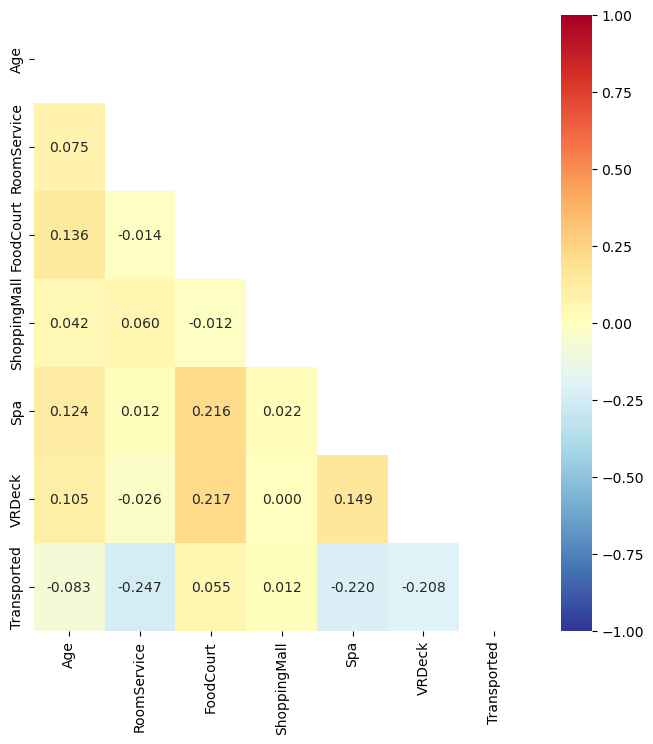

In [10]:
plots.make_corr_heatmap(data1)

In [12]:
print(dir(rock.useful))

how_to_use_handle_NAN()

['KNNImputer', 'NAN_preview', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'checkNAN', 'check_features', 'check_unique', 'createFolder', 'handle_NAN', 'how_to_use_handle_NAN', 'os', 'pd', 'warnings']
# ex) (If you put -1 in the order, it won't run.)
df = data
list = [['for_fill_na'], ['for_fill_value1', 'for_fill_value2'], ['for_back_fill'], ['for_front_fill'], ['for_linear'], ['for_KNN_imputer1', 'for_KNN_imputer2']]
fill_na = [ 0, Value_to_fill ] # <-- (The number that goes into the first digit is the order of processing.)
fill_value = [ 1, [ Value_to_fill1, Value_to_fill2 ]]
back_fill = 2
front_fill = 3
linear = 4
KNN = [ 5, n_neighbors ]
